### RandomForest Model

Na pripremljenim podacima sada primjenjujemo metodu Random Forest. Za to koristimo Pythonovu biblioteku scikit-learn, koja podržava rad sa strojnim učenjem, posebno i s metodom Random Forest.
Nakon što smo istrenirali model na skupu za treniranje, radimo predikciju na testnom skupu.
Zatim prikazujemo graf iz kojeg je vidiljivo koje svojstvo ima koliku važnost.
Predikcija ovim modelom na kaggleu je postigla rezultat 0.76717.

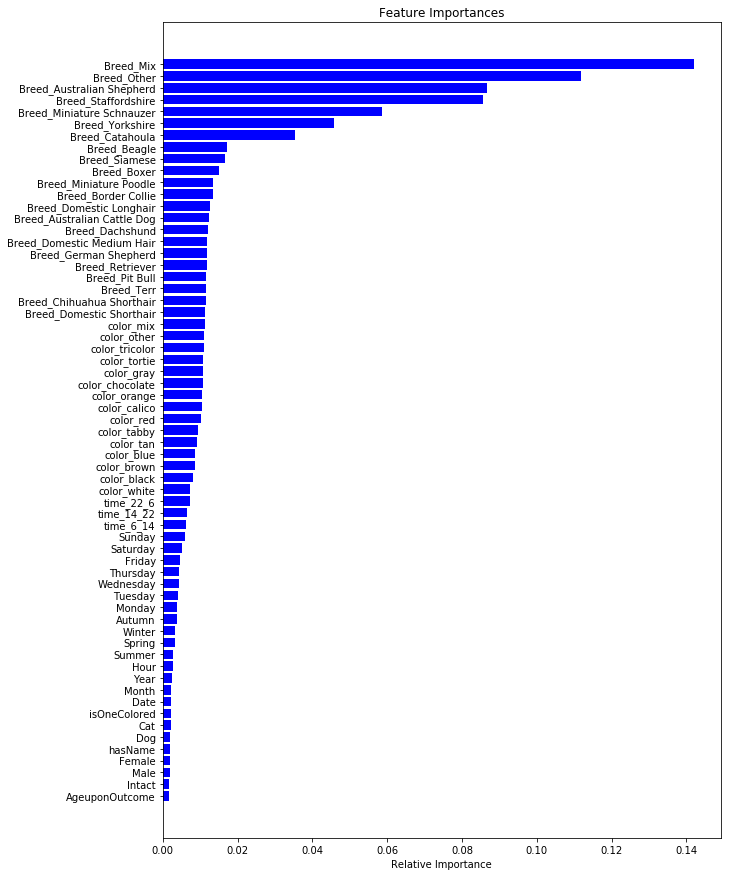

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

train_set = pd.read_csv('data/clean_train_randomForest.csv', encoding='ISO-8859-1')

train_set_values = train_set['OutcomeType'].values
train_set.drop(['OutcomeType', 'AnimalID', 'Name', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'Sex', 'Breed', 'Color', 'DateTime'], axis=1, inplace=True)

# Saving feature names for later use
feature_list = list(train_set.columns)
feature_list = np.array(feature_list)

# Convert to numpy array
train_set = np.array(train_set)

rf = RandomForestClassifier(n_estimators = 500, n_jobs = 2)
rf.fit(train_set, train_set_values);

# Plotting feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.rcParams['figure.figsize'] = [10, 15]
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_list)
plt.xlabel('Relative Importance')
plt.show()

# Test set
test_set = pd.read_csv('data/clean_test_randomForest.csv', encoding='ISO-8859-1')
test_set.drop(['ID', 'Name', 'AnimalType', 'SexuponOutcome', 'Sex', 'Breed', 'Color', 'DateTime'], axis=1, inplace=True)

# Use the forest's predict method on the test set
predictions = rf.predict_proba(test_set)

final_results = pd.DataFrame(predictions)
final_results.columns = ['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']
final_results.index.name = 'ID'
final_results.index = final_results.index + 1

final_results = final_results[['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']]

final_results.to_csv('data/results.csv')